In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -a "Kenneth Brezinski" -v

Author: Kenneth Brezinski

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.22.0



In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%watermark --iversions

numpy     : 1.19.2
matplotlib: 3.3.3
pandas    : 1.4.1



In [77]:
df = pd.read_csv('data/mobility.csv')

In [82]:
is_CA = df['location_key'].apply(lambda x: x.startswith('CA_MB') if isinstance(x, str) else False)
df_CA = df[is_CA]
df_CA = df_CA.drop(['date', 'location_key'], axis=1)
print(df_CA.columns)

Index(['mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
       'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential'],
      dtype='object')


<AxesSubplot:>

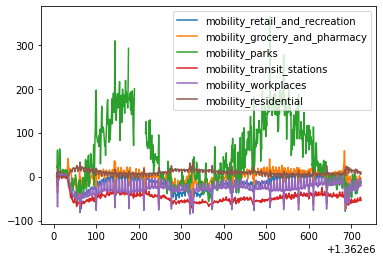

In [83]:
df_CA.plot()

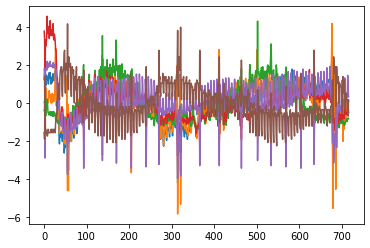

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

## performs quite well; better to just stick to 
X = df_CA
pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNNImputer(n_neighbors=5, weights="distance"))])
trans = pipe.fit_transform(X)

plt.plot(trans)

In [88]:
cols = df_CA.columns
for col in cols:
    
    # check if column has missing data
    if df_CA[col].isnull().sum() == 0:
        continue
        
    print(col)

#print(cols)
#df_CA[cols[4]].plot()

mobility_parks
